In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mpii-human-pose/mpii_human_pose.csv
/kaggle/input/mpii-human-pose/mpii_annotations.json
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/024299759.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/032318978.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/047111035.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/089678841.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/031435011.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/067983676.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/007098919.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/048138271.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/081060385.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/096934961.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/069637585.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/072147708.jpg
/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/07

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/kaggle/input/mpii-human-pose/mpii_human_pose.csv')
data.head()

ID           NAME  r ankle_X  r ankle_Y  r knee_X  r knee_Y  r hip_X  \
0   1  015601864.jpg        620        394       616       269      573   
1   2  015599452.jpg         -1         -1        -1        -1      806   
2   3  005808361.jpg        804        711       816       510      908   
3   4  086617615.jpg        301        461       305       375      201   
4   5  060111501.jpg        980        322       896       318      865   

   r hip_Y  l hip_X  l hip_Y  ...  r shoulder_Y  l shoulder_X  l shoulder_Y  \
0      185      647      188  ...           167           692           185   
1      543      720      593  ...           281           719           299   
2      438     1040      454  ...           253          1067           253   
3      340      294      342  ...           261           314           264   
4      248      943      226  ...           147           923           123   

   l elbow_X  l elbow_Y  l wrist_X  l wrist_Y     Scale  Activity  Category  
0        693        240        688        313  3.021046   curling    sports  
1        711        516        545        466  5.641276   curling    sports  
2       1167        353       1142        478  4.718488   curling    sports  
3        327        320        362        346  2.681349   curling    sports  
4        995        163        961        223  3.806403   curling    sports  

[5 rows x 37 columns]

In [6]:
data=data.drop(['Scale','Activity','Category'],axis=1)
data = data.drop(data.columns[0], axis=1)
data.head()
data.shape

(17372, 33)

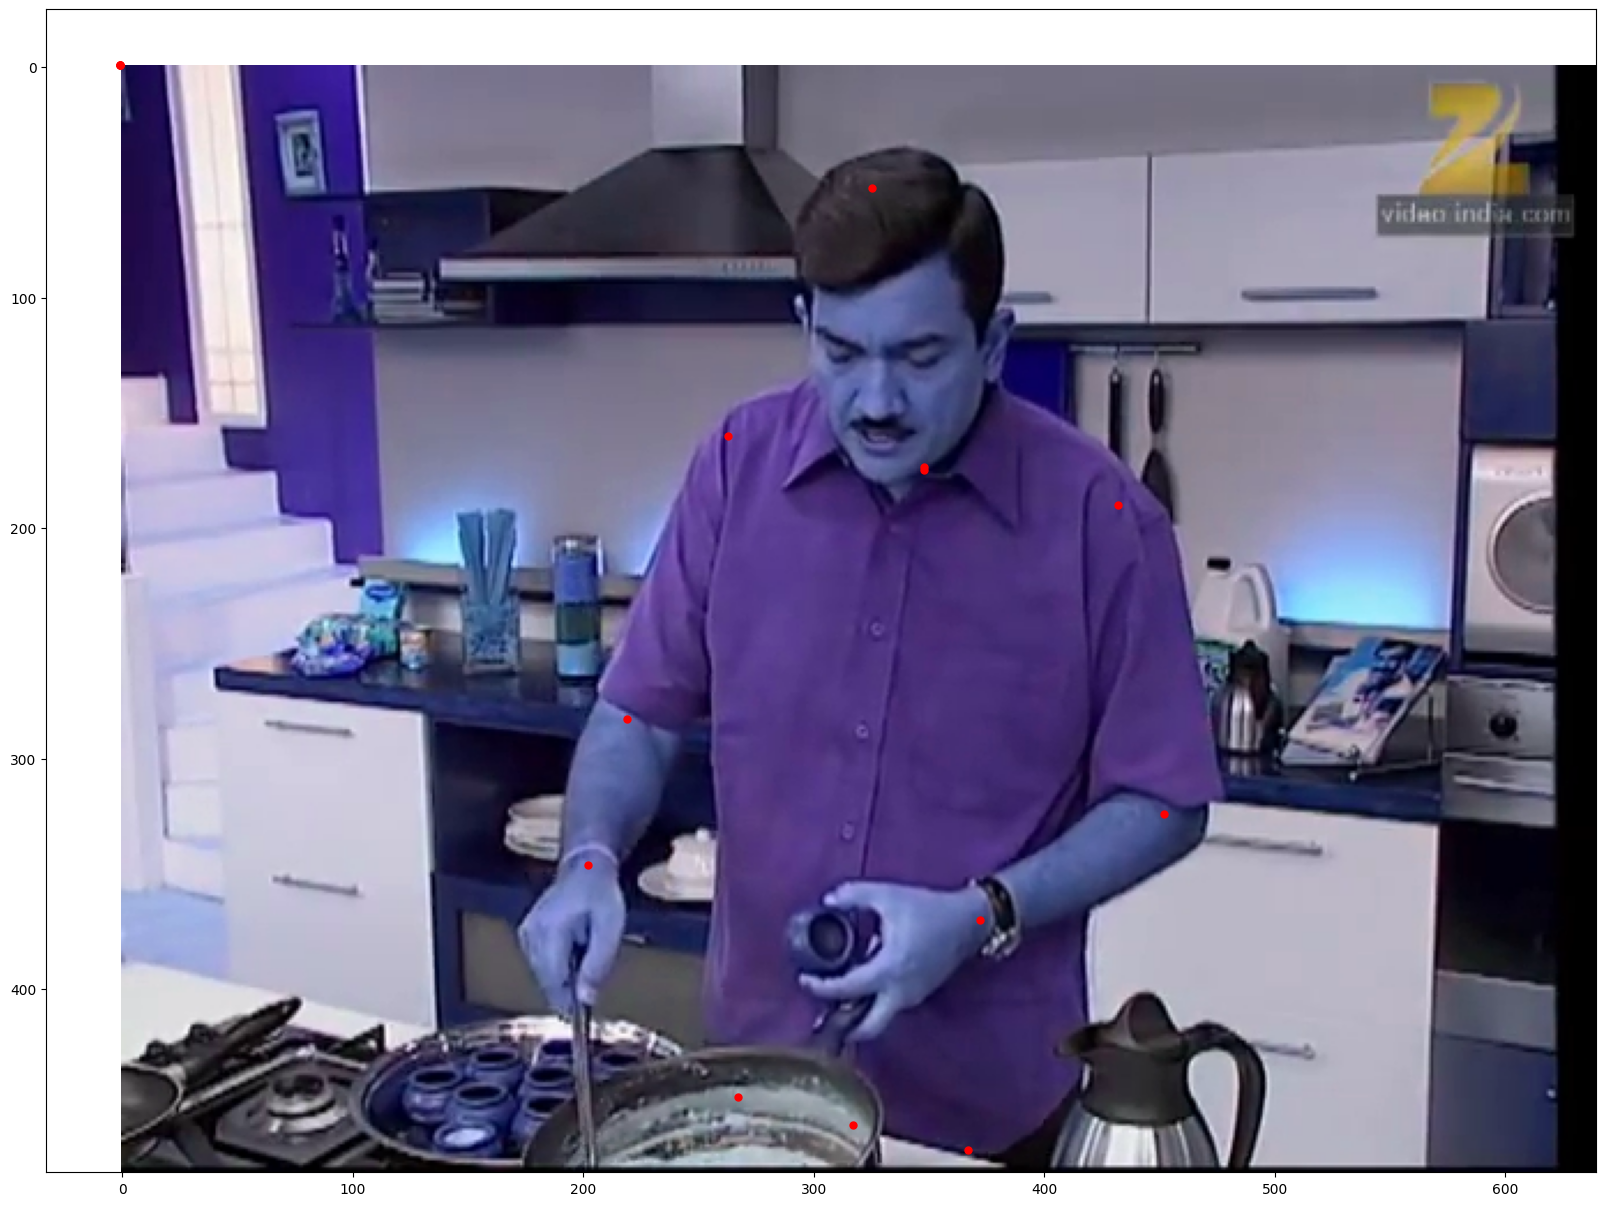

In [7]:
img = cv2.imread("/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/000041029.jpg", cv2.IMREAD_COLOR)

# Create a figure and set its size
plt.figure(figsize=(20, 25))

# Display the image
plt.imshow(img,)  # BGR to RGB conversion

# Access the target row in the DataFrame
target_row = data[data['NAME'] == '000041029.jpg'].index[0]

# List to store the (x, y) coordinates
coordinates = []

# Iterate over the provided coordinates
for col in range(1, 32, 2):
    x = data.iloc[target_row, col]
    y = data.iloc[target_row, col + 1]
    
    # Add the coordinate to the list
#     coordinates.append((x, y))
    
    # Add the circle to the plot
    plt.plot(x, y, 'ro', markersize=5)  # 'ro' stands for red circle with marker size 5


plt.show()

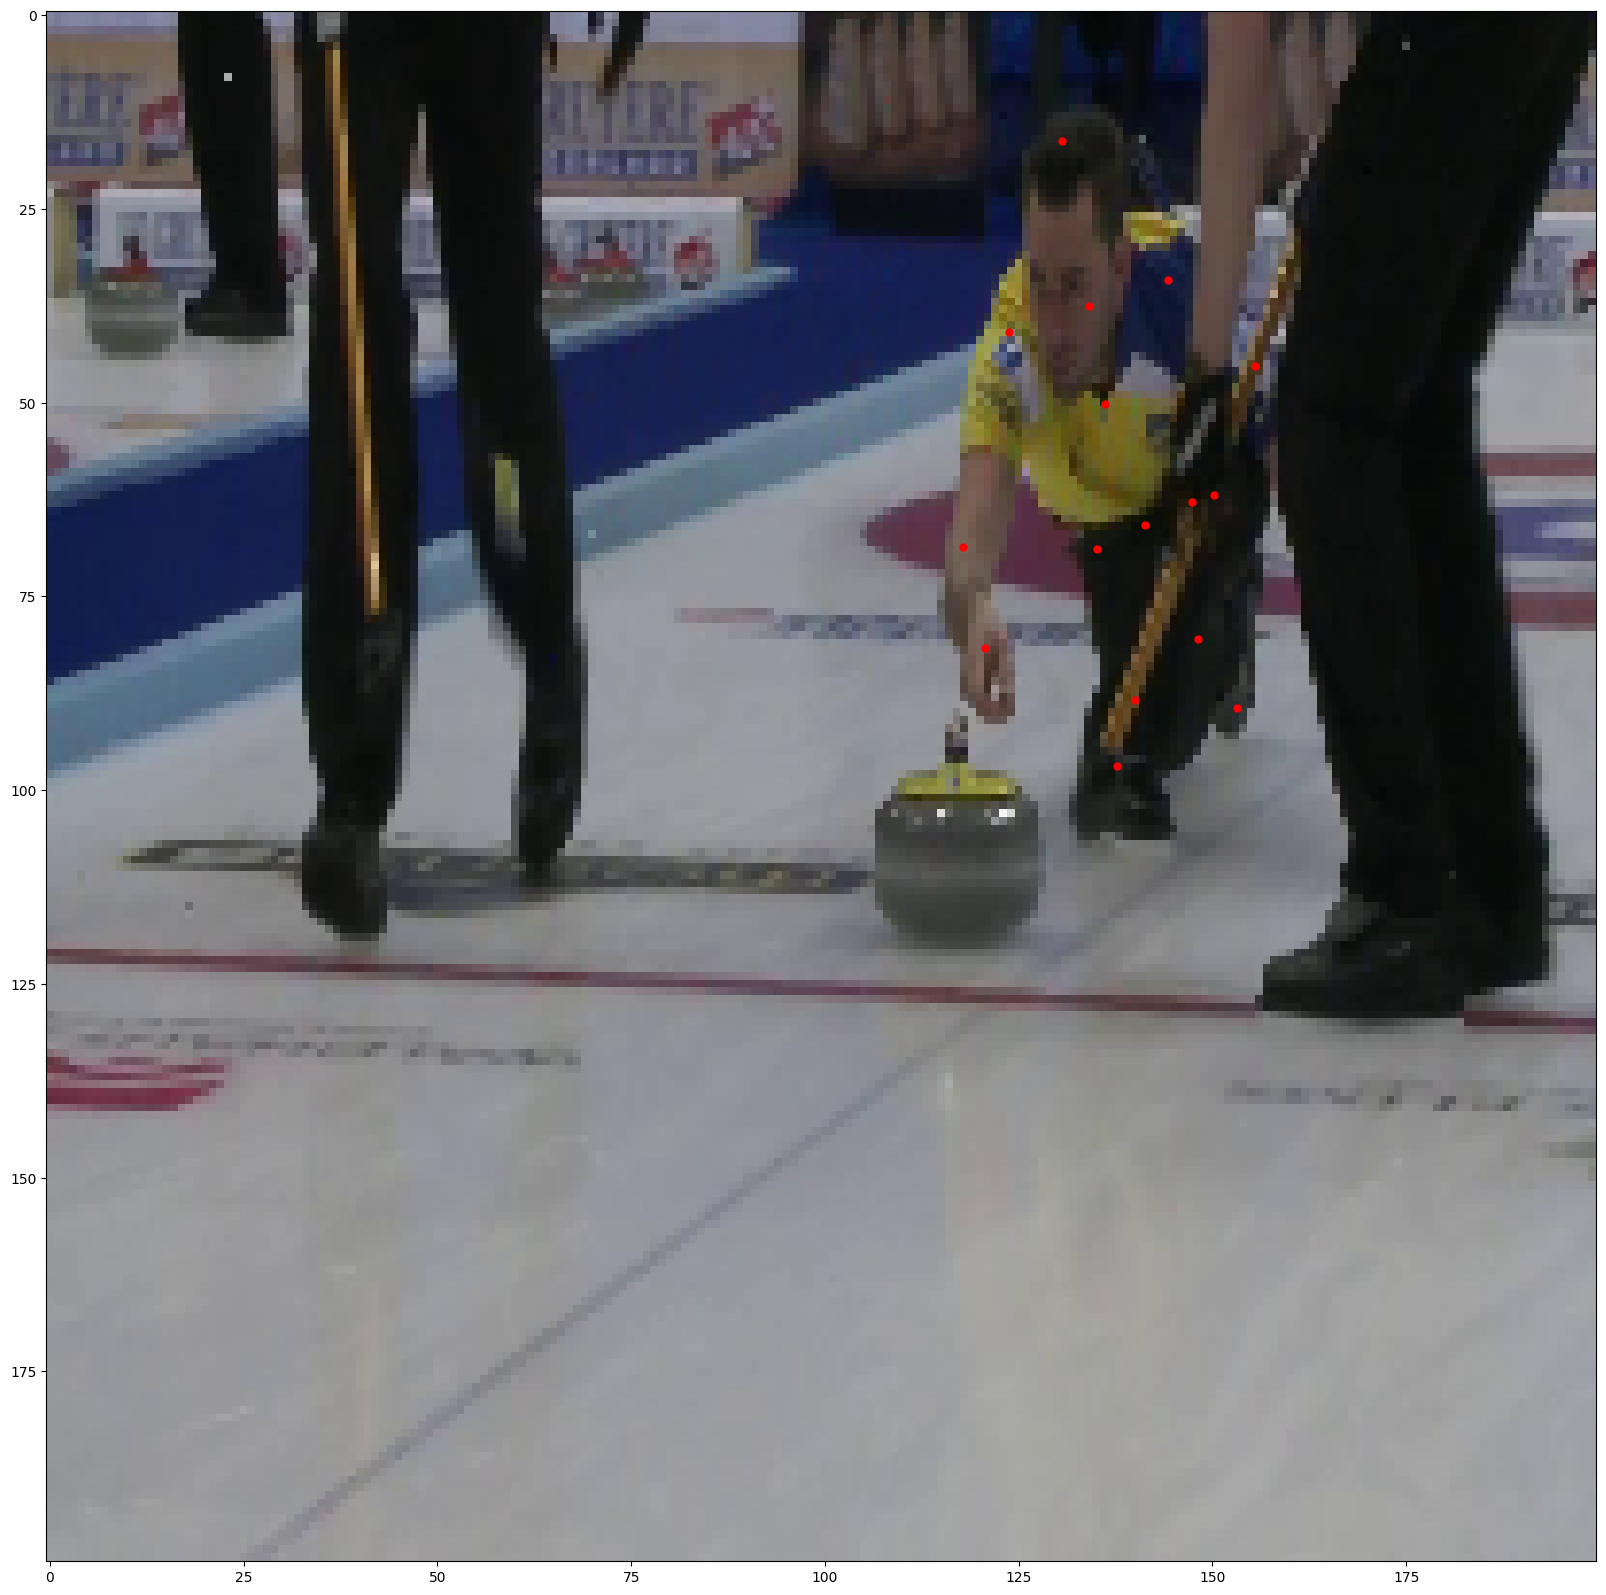

In [8]:
img = cv2.imread("/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/060111501.jpg", cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Access the target row in the DataFrame
target_row = data[data['NAME'] == '060111501.jpg'].index[0]
width = 200
height = 200

# Resize the image using resize() function
resize_img = cv2.resize(img, (width, height))
original_height,original_width,_ = img.shape
# Create a figure and set its size
plt.figure(figsize=(20, 25))

# Display the image
plt.imshow(resize_img)  # BGR to RGB conversion

for col in range(1, 32, 2):
    x = data.iloc[target_row, col]
    y = data.iloc[target_row, col + 1]
    x = float(x)
    y = float(y)
    x = x*(width/original_width)
    y = y*(height/original_height)
    
    # Add the circle to the plot
    plt.plot(x, y, 'ro', markersize=5)  # 'ro' stands for red circle with marker size 5

plt.show()

In [9]:
sample = data.sample(n=1000)
sample.reset_index(drop=True, inplace=True)
sample.head(10)

NAME  r ankle_X  r ankle_Y  r knee_X  r knee_Y  r hip_X  r hip_Y  \
0  057209461.jpg        643        659       636       506      651      381   
1  096766420.jpg         -1         -1       869       981      838      628   
2  005658566.jpg        463        409       437       304      287      335   
3  027230733.jpg        285        361       274       294      253      231   
4  025938000.jpg        636        767       629       713      578      695   
5  038339714.jpg         -1         -1        -1        -1      747      576   
6  024413682.jpg        653        493       668       361      674      220   
7  001763483.jpg         -1         -1        -1        -1      771      926   
8  089481666.jpg         -1         -1        -1        -1       -1       -1   
9  032059391.jpg         -1         -1       553       353      396      240   

   l hip_X  l hip_Y  l knee_X  ...  r elbow_X  r elbow_Y  r shoulder_X  \
0      696      381       703  ...        671        261           662   
1      997      593      1040  ...        733        593           699   
2      276      307       412  ...        277        291           262   
3      301      224       307  ...        224        208           238   
4      560      696       550  ...        586        669           593   
5      804      566        -1  ...        620        429           698   
6      683      218       687  ...        584        192           582   
7      892      923        -1  ...        372        606           611   
8       -1       -1        -1  ...        444        139           472   
9      394      288       532  ...        422        104           346   

   r shoulder_Y  l shoulder_X  l shoulder_Y  l elbow_X  l elbow_Y  l wrist_X  \
0           179           700           188        680        299        603   
1           376           947           187       1049        345       1053   
2           209           245           190        254        234        312   
3           166           298           156        317        194        334   
4           636           574           626        585        653        609   
5           298           804           289        792        418        890   
6            89           607            89        615        199        539   
7           411           970           339       1195        544         -1   
8           110           543           101        505        124        453   
9            58           368           154        402        215        505   

   l wrist_Y  
0        381  
1        503  
2        226  
3        230  
4        661  
5        414  
6        256  
7         -1  
8        117  
9        182  

[10 rows x 33 columns]

In [10]:
image_dir = "/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images"

import cv2

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    original_height, original_width, _ = img.shape
    img = cv2.resize(img, (256, 256))  # Resize the image to your desired size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img.astype("float32") / 255.0  # Normalize the pixel values between 0 and 1
    
    return (img, original_width, original_height)

# Create new columns in the DataFrame to store the preprocessed image data, original width, and original height
sample[['image_data', 'original_width', 'original_height']] = sample['NAME'].apply(lambda x: pd.Series(load_and_preprocess_image(f"{image_dir}/{x}")))



In [11]:
sample.head(10)

NAME  r ankle_X  r ankle_Y  r knee_X  r knee_Y  r hip_X  r hip_Y  \
0  057209461.jpg        643        659       636       506      651      381   
1  096766420.jpg         -1         -1       869       981      838      628   
2  005658566.jpg        463        409       437       304      287      335   
3  027230733.jpg        285        361       274       294      253      231   
4  025938000.jpg        636        767       629       713      578      695   
5  038339714.jpg         -1         -1        -1        -1      747      576   
6  024413682.jpg        653        493       668       361      674      220   
7  001763483.jpg         -1         -1        -1        -1      771      926   
8  089481666.jpg         -1         -1        -1        -1       -1       -1   
9  032059391.jpg         -1         -1       553       353      396      240   

   l hip_X  l hip_Y  l knee_X  ...  r shoulder_Y  l shoulder_X  l shoulder_Y  \
0      696      381       703  ...           179           700           188   
1      997      593      1040  ...           376           947           187   
2      276      307       412  ...           209           245           190   
3      301      224       307  ...           166           298           156   
4      560      696       550  ...           636           574           626   
5      804      566        -1  ...           298           804           289   
6      683      218       687  ...            89           607            89   
7      892      923        -1  ...           411           970           339   
8       -1       -1        -1  ...           110           543           101   
9      394      288       532  ...            58           368           154   

   l elbow_X  l elbow_Y  l wrist_X  l wrist_Y  \
0        680        299        603        381   
1       1049        345       1053        503   
2        254        234        312        226   
3        317        194        334        230   
4        585        653        609        661   
5        792        418        890        414   
6        615        199        539        256   
7       1195        544         -1         -1   
8        505        124        453        117   
9        402        215        505        182   

                                          image_data  original_width  \
0  [[[0.8039216, 0.76862746, 0.64705884], [0.8313...            1280   
1  [[[0.8392157, 0.8862745, 0.8392157], [0.839215...            1920   
2  [[[0.1254902, 0.078431375, 0.07450981], [0.117...             712   
3  [[[0.16078432, 0.13725491, 0.14509805], [0.250...             854   
4  [[[0.06666667, 0.09803922, 0.050980393], [0.05...            1920   
5  [[[0.60784316, 0.78431374, 1.0], [0.6039216, 0...            1280   
6  [[[0.078431375, 0.0, 0.003921569], [0.09803922...            1280   
7  [[[0.92156863, 0.9254902, 0.89411765], [0.8235...            1920   
8  [[[0.007843138, 0.007843138, 0.007843138], [0....             854   
9  [[[0.28627452, 0.39607844, 0.6509804], [0.2862...             854   

   original_height  
0              720  
1             1080  
2              480  
3              480  
4             1080  
5              720  
6              720  
7             1080  
8              470  
9              480  

[10 rows x 36 columns]

In [12]:
for row in range(0, 1000):
    for col in range(1, 33, 2):
        if sample.iloc[row, col] != -1:
            sample.iloc[row, col] = sample.iloc[row, col] * (256 / sample.at[row, 'original_width'])
            sample.iloc[row, col + 1] = sample.iloc[row, col + 1] * (256 / sample.at[row, 'original_height'])
        
sample.head()

/tmp/ipykernel_42/2917283658.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '128.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample.iloc[row, col] = sample.iloc[row, col] * (256 / sample.at[row, 'original_width'])
/tmp/ipykernel_42/2917283658.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '234.31111111111113' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample.iloc[row, col + 1] = sample.iloc[row, col + 1] * (256 / sample.at[row, 'original_height'])
/tmp/ipykernel_42/2917283658.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '127.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample.iloc[row, col] = sample.iloc[row, col] * (256 

NAME   r ankle_X   r ankle_Y    r knee_X    r knee_Y     r hip_X  \
0  057209461.jpg  128.600000  234.311111  127.200000  179.911111  130.200000   
1  096766420.jpg   -1.000000   -1.000000  115.866667  232.533333  111.733333   
2  005658566.jpg  166.471910  218.133333  157.123596  162.133333  103.191011   
3  027230733.jpg   85.433255  192.533333   82.135831  156.800000   75.840749   
4  025938000.jpg   84.800000  181.807407   83.866667  169.007407   77.066667   

      r hip_Y     l hip_X     l hip_Y    l knee_X  ...  r shoulder_Y  \
0  135.466667  139.200000  135.466667  140.600000  ...     63.644444   
1  148.859259  132.933333  140.562963  138.666667  ...     89.125926   
2  178.666667   99.235955  163.733333  148.134831  ...    111.466667   
3  123.200000   90.229508  119.466667   92.028103  ...     88.533333   
4  164.740741   74.666667  164.977778   73.333333  ...    150.755556   

   l shoulder_X  l shoulder_Y   l elbow_X   l elbow_Y   l wrist_X   l wrist_Y  \
0    140.000000     66.844444  136.000000  106.311111  120.600000  135.466667   
1    126.266667     44.325926  139.866667   81.777778  140.400000  119.229630   
2     88.089888    101.333333   91.325843  124.800000  112.179775  120.533333   
3     89.330211     83.200000   95.025761  103.466667  100.121780  122.666667   
4     76.533333    148.385185   78.000000  154.785185   81.200000  156.681481   

                                          image_data  original_width  \
0  [[[0.8039216, 0.76862746, 0.64705884], [0.8313...            1280   
1  [[[0.8392157, 0.8862745, 0.8392157], [0.839215...            1920   
2  [[[0.1254902, 0.078431375, 0.07450981], [0.117...             712   
3  [[[0.16078432, 0.13725491, 0.14509805], [0.250...             854   
4  [[[0.06666667, 0.09803922, 0.050980393], [0.05...            1920   

   original_height  
0              720  
1             1080  
2              480  
3              480  
4             1080  

[5 rows x 36 columns]

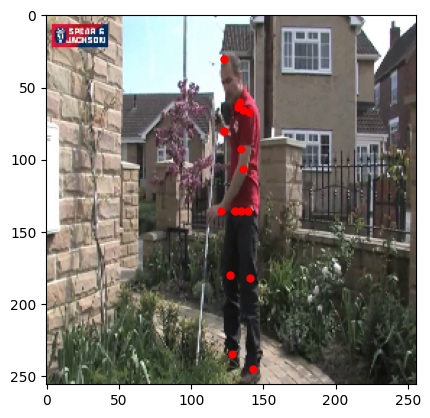

In [13]:

plt.imshow(sample.at[0,'image_data'])

for col in range(1, 33, 2):
    x = sample.iloc[0, col]
    y = sample.iloc[0, col + 1]
    if x!=-1:
        plt.plot(x, y, 'ro', markersize=5)  # 'ro' stands for red circle with marker size 5
    

plt.show()


(1000, 256, 256, 3)
(1000, 32)
128.6


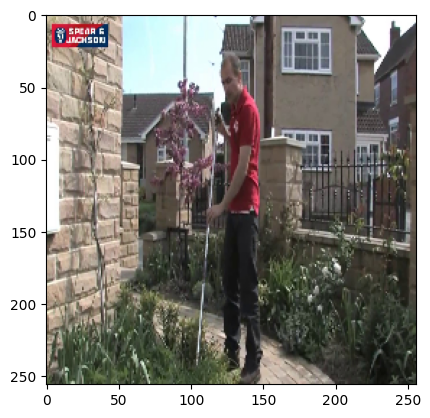

In [14]:
image_list = []
labels=[]
p='/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/'
for row in range(0,1000):
    path=sample.iloc[row,0]
    img = sample.iloc[row,33]
    labels.append(sample.iloc[row,1:33])
    image_list.append(img)

X = np.array(image_list)
y=np.array(labels)
print(X.shape)
print(y.shape)
print(y[0][0])
X = X.astype(np.float32)
y = y.astype(np.float32)
plt.imshow(X[0])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature data and 'y' is your target variable data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape
print(y_train[0])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[ 86.       158.57777   86.2      124.44444   82.4       85.68889
  72.6       86.4       75.8      112.35555   75.4      138.31111
  77.6       86.04444   86.2       51.91111   87.16718   48.79975
  93.63282   28.000248 104.2       84.26667   97.2       72.17778
  91.8       48.        80.4       55.466667  90.4       82.48889
  99.8       98.13333 ]


In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import numpy as np

def build_rcnn(input_shape=(256, 256, 3), num_keypoints=16):
    inputs = layers.Input(shape=input_shape)
    
    # Convolutional base
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Region proposal layer (simplified for demonstration)
    region_proposals = layers.Conv2D(9, (1, 1), activation='sigmoid', padding='same')(x)  # 9 anchor boxes
    
    # Flatten and Dense layers for keypoint prediction
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    keypoints = layers.Dense(num_keypoints * 2)(x)  # num_keypoints * 2 for (x, y) pairs
    
    model = models.Model(inputs=inputs, outputs=[region_proposals, keypoints])
    return model

num_keypoints = 16
rcnn_model = build_rcnn(num_keypoints=num_keypoints)
rcnn_model.summary()

# Compile the model with appropriate loss functions
rcnn_model.compile(optimizer='adam', 
                   loss=['categorical_crossentropy', 'mse'],  # Dummy loss for region proposals and mse for keypoints
                   metrics=['accuracy'])

# Ensure X and y are numpy arrays with the correct shape
X = np.array(image_list, dtype=np.float32)
y = np.array(labels, dtype=np.float32).reshape(-1, num_keypoints * 2)

print(X.shape)  # Should be (1000, 256, 256, 3)
print(y.shape)  # Should be (1000, 32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Dummy region proposal labels for training (should match the output shape of the region proposal network)
region_proposal_labels = np.zeros((X_train.shape[0], 8, 8, 9))

# Train the model
rcnn_model.fit(X_train, [region_proposal_labels, y_train], epochs=40, batch_size=32)

# Evaluate the model on the test set
rcnn_model.evaluate(X_test, [np.zeros((X_test.shape[0], 8, 8, 9)), y_test])

# Save the model
model_save_path = '/kaggle/working/rcnn_model.h5'
rcnn_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Load the model
loaded_model = models.load_model(model_save_path)
loaded_model.summary()

# Evaluate the loaded model to ensure it was saved and loaded correctly
loaded_model.evaluate(X_test, [np.zeros((X_test.shape[0], 8, 8, 9)), y_test])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /kaggle/working/rcnn_model.h5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                              

[2838.484130859375, 0.0, 2838.484130859375, 0.0, 0.05999999865889549]

1/1 [==============================] - 1s 967ms/step


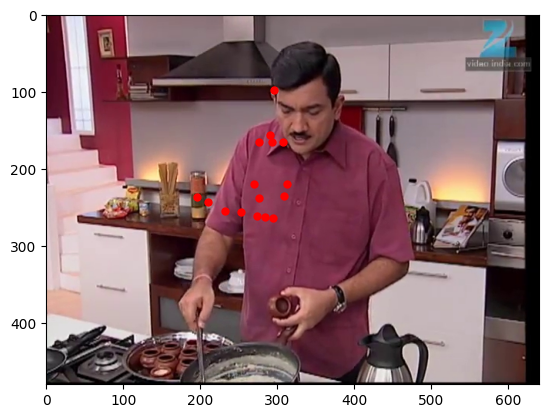

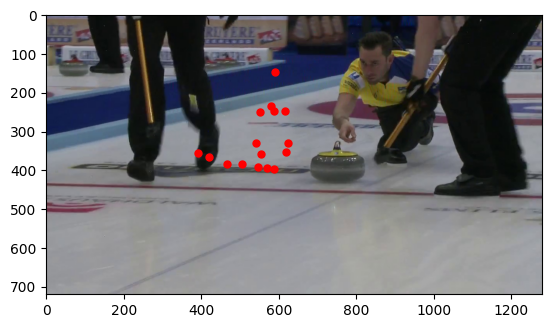

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models

# Load the saved model
model_save_path = '/kaggle/working/rcnn_model.h5'
loaded_model = models.load_model(model_save_path)

# Function to preprocess images
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    original_height, original_width, _ = img.shape
    img = cv2.resize(img, (256, 256))  # Resize the image to match the model's input shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img.astype("float32") / 255.0  # Normalize the pixel values between 0 and 1
    return img, original_width, original_height

# Select two images from the dataset
image_paths = [
    "/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/000041029.jpg",
    "/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/060111501.jpg"
]

# Preprocess the images
preprocessed_images = []
original_dimensions = []
for image_path in image_paths:
    img, original_width, original_height = load_and_preprocess_image(image_path)
    preprocessed_images.append(img)
    original_dimensions.append((original_width, original_height))

preprocessed_images = np.array(preprocessed_images)

# Predict the keypoints using the loaded model
# Note: We're only interested in the keypoints, hence the second output of the model
_, keypoints_pred = loaded_model.predict(preprocessed_images)

# Function to plot keypoints on the image
def plot_keypoints(image, keypoints, original_width, original_height):
    plt.imshow(image)
    for i in range(0, len(keypoints), 2):
        x = keypoints[i] * original_width / 256  # Rescale the keypoints to original image dimensions
        y = keypoints[i + 1] * original_height / 256
        plt.plot(x, y, 'ro', markersize=5)  # 'ro' stands for red circle with marker size 5
    plt.show()

# Visualize the keypoints on the images
for i in range(len(image_paths)):
    original_image = cv2.imread(image_paths[i])
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_width, original_height = original_dimensions[i]
    keypoints = keypoints_pred[i]
    
    plot_keypoints(original_image, keypoints, original_width, original_height)
